Cross-Validation Accuracy: 1.00 ± 0.00
Test Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00       162
           2       1.00      1.00      1.00       162
           3       1.00      1.00      1.00       162
           4       1.00      1.00      1.00       162
           5       1.00      1.00      1.00       162
           6       1.00      1.00      1.00       162
           7       1.00      1.00      1.00       162
           8       1.00      1.00      1.00       162
           9       1.00      1.00      1.00       162
          10       1.00      1.00      1.00       162
          11       1.00      1.00      1.00       162
          12       1.00      1.00      1.00       162
          13       1.00      1.00      1.00       162
          14       1.00      1.00      1.00       162
          15       1.00      1.00      1.00       16

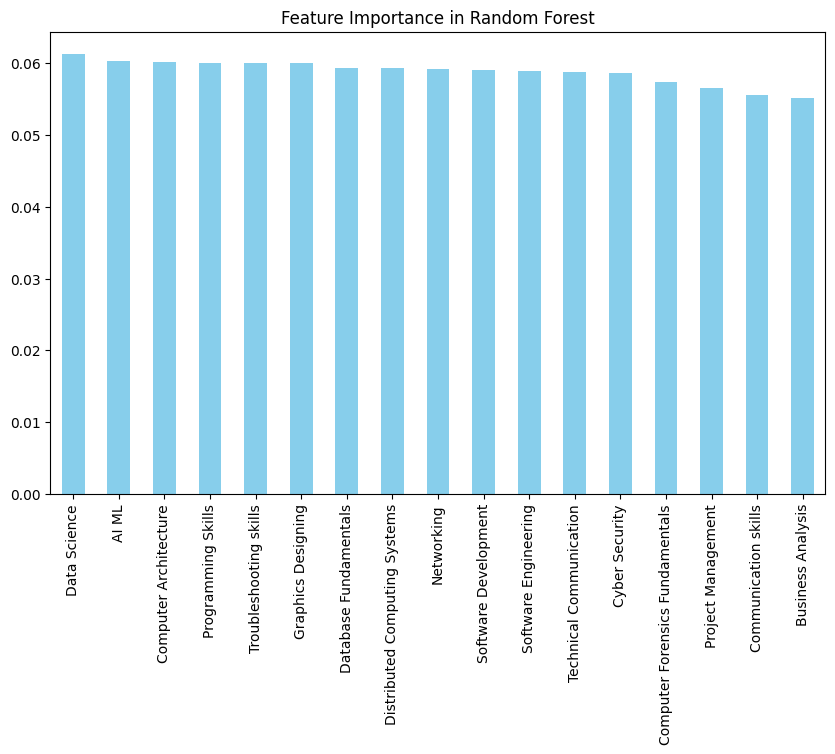

Predicted Role: Database Administrator


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("dataset9000.csv")

# Encode categorical features
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = df.drop(columns=['Role'])  # Features
y = df['Role']  # Target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train Random Forest Classifier with optimized parameters
model = RandomForestClassifier(
    n_estimators=200,            # More trees for stability
    max_depth=12,                # Prevents overfitting
    min_samples_split=5,         # Reduces overfitting
    min_samples_leaf=2,          # Forces trees to be more general
    class_weight='balanced',     # Handles class imbalance
    random_state=42
)

# Train model
model.fit(X_train, y_train)

# Cross-validation for better accuracy estimation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance Visualization
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind="bar", color="skyblue")
plt.title("Feature Importance in Random Forest")
plt.show()

import pandas as pd

# Example custom test data (Replace with real values)
custom_data = pd.DataFrame({
    'Database Fundamentals': ['Professional'],
    'Computer Architecture': ['Not Interested'],
    'Distributed Computing Systems': ['Not Interested'],
    'Cyber Security': ['Not Interested'],
    'Networking': ['Not Interested'],
    'Software Development': ['Not Interested'],
    'Programming Skills': ['Not Interested'],
    'Project Management': ['Not Interested'],
    'Computer Forensics Fundamentals': ['Not Interested'],
    'Technical Communication': ['Not Interested'],
    'AI ML': ['Not Interested'],
    'Software Engineering': ['Not Interested'],
    'Business Analysis': ['Not Interested'],
    'Communication skills': ['Not Interested'],
    'Data Science': ['Not Interested'],
    'Troubleshooting skills': ['Not Interested'],
    'Graphics Designing': ['Not Interested']
})

# Apply Label Encoding to test data using previously trained encoders
for column in custom_data.columns:
    if column in label_encoders:  # Use the same encoders from training
        custom_data[column] = label_encoders[column].transform(custom_data[column])

# Ensure the test data matches the training feature format
custom_data = custom_data.reindex(columns=X.columns, fill_value=0)

# Make prediction
custom_prediction = model.predict(custom_data)

print("Predicted Role:", label_encoders['Role'].inverse_transform(custom_prediction)[0])




      Database Fundamentals_Beginner  Database Fundamentals_Excellent  \
0                              False                            False   
1                              False                            False   
2                              False                            False   
3                              False                            False   
4                              False                            False   
...                              ...                              ...   
9174                           False                            False   
9175                           False                            False   
9176                           False                            False   
9177                           False                            False   
9178                           False                            False   

      Database Fundamentals_Intermediate  \
0                                  False   
1                                  

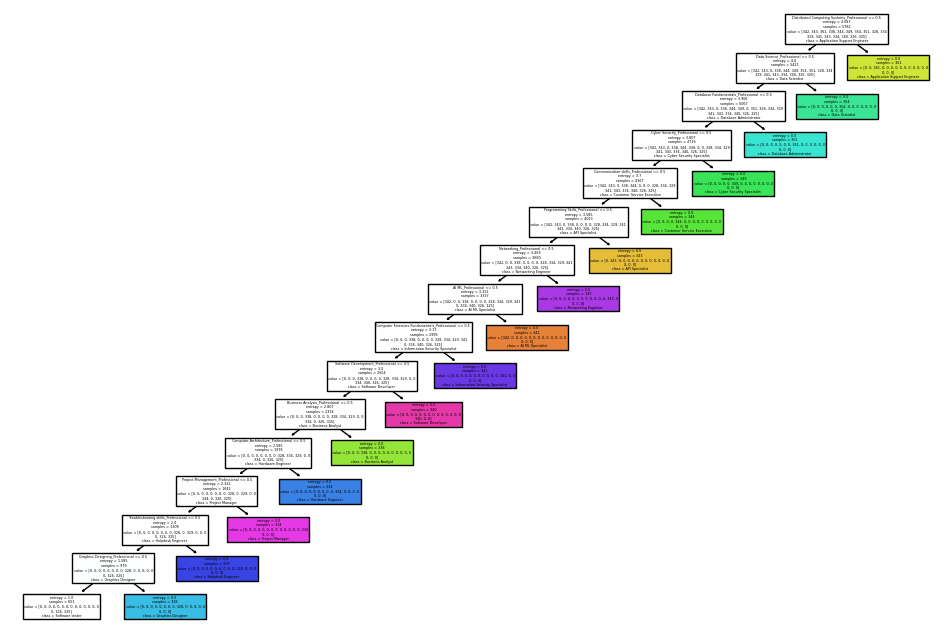

Top 3 Recommended Careers:
1. Application Support Engineer
2. Technical Writer
3. Database Administrator


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pickle

# Load the dataset
df = pd.read_csv("dataset9000.csv")

# Separate features (X) and target (y)
X = df.drop(columns=['Role'])  # Features
y = df['Role']  # Target

# Apply One-Hot Encoding for categorical features
X = pd.get_dummies(X, drop_first=True)
print(X)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state=40)

# Train Decision Tree Classifier with optimized parameters
model = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=6, random_state=40)
model.fit(X_train, y_train)

# Save the model
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Show feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

# Plot Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=list(map(str, model.classes_)))
plt.show()

# Example custom test data (replace with desired values)
custom_data = pd.DataFrame({
    'Database Fundamentals': ['Not Intrested'],
    'Computer Architecture': ['Professional'],
    'Distributed Computing Systems': ['Professional'],
    'Cyber Security': ['Professional'],
    'Networking': ['Professional'],
    'Software Development': ['Professional'],
    'Programming Skills': ['Professional'],
    'Project Management': ['Professional'],
    'Computer Forensics Fundamentals': ['Professional'],
    'Technical Communication': ['Professional'],
    'AI ML': ['Professional'],
    'Software Engineering': ['Professional'],
    'Business Analysis': ['Professional'],
    'Communication skills': ['Professional'],
    'Data Science': ['Professional'],
    'Troubleshooting skills': ['Professional'],
    'Graphics Designing': ['Professional']
})

# Ensure the test data matches training data format
custom_data_encoded = pd.get_dummies(custom_data)
custom_data_encoded = custom_data_encoded.reindex(columns=X.columns, fill_value=0)

# Get prediction probabilities for all roles
probabilities = model.predict_proba(custom_data_encoded)

# Get top 3 career roles
top_3_indices = np.argsort(probabilities[0])[-3:][::-1]  # Get indices of top 3
top_3_careers = model.classes_[top_3_indices]  # Get corresponding role names

print("Top 3 Recommended Careers:")
for i, career in enumerate(top_3_careers, 1):
    print(f"{i}. {career}")


Accuracy: 0.94
Precision: 0.97
Recall: 0.94
                                           Feature  Importance
17      Distributed Computing Systems_Professional    0.084061
89                       Data Science_Professional    0.082102
5               Database Fundamentals_Professional    0.079603
23                     Cyber Security_Professional    0.077839
29                         Networking_Professional    0.075811
..                                             ...         ...
34                       Software Development_Poor    0.000000
33             Software Development_Not Interested    0.000000
32               Software Development_Intermediate    0.000000
31                  Software Development_Excellent    0.000000
51  Computer Forensics Fundamentals_Not Interested    0.000000

[102 rows x 2 columns]


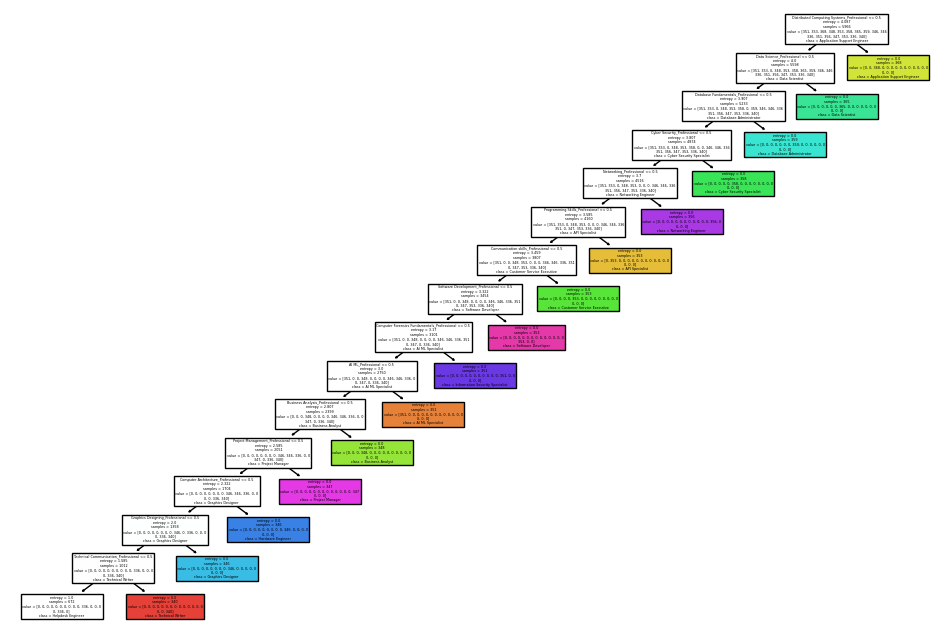

Predicted Role: Database Administrator


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pickle

# Load the dataset
df = pd.read_csv("dataset9000.csv")

# Separate features (X) and target (y)
X = df.drop(columns=['Role'])  # Features
y = df['Role']  # Target

# Apply One-Hot Encoding for categorical features
X = pd.get_dummies(X, drop_first=True)


# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=40)

# Train Decision Tree Classifier with optimized parameters
model = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=6, random_state=40)
model.fit(X_train, y_train)


with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Show feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

# Plot Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=list(map(str, model.classes_)))
plt.show()


import pandas as pd

# Example custom test data (replace with desired values)
custom_data = pd.DataFrame({
    'Database Fundamentals': ['Professional'],
    'Computer Architecture': ['Poor'],
    'Distributed Computing Systems': ['Poor'],
    'Cyber Security': ['Poor'],
    'Networking': ['Excellent'],
    'Software Development': ['Poor'],
    'Programming Skills': ['Poor'],
    'Project Management': ['Poor'],
    'Computer Forensics Fundamentals': ['Poor'],
    'Technical Communication': ['Poor'],
    'AI ML': ['Poor'],
    'Software Engineering': ['Poor'],
    'Business Analysis': ['Poor'],
    'Communication skills': ['Poor'],
    'Data Science': ['Poor'],
    'Troubleshooting skills': ['Poor'],
    'Graphics Designing': ['Poor']
})

# Ensure the test data matches training data format
custom_data_encoded = pd.get_dummies(custom_data)
custom_data_encoded = custom_data_encoded.reindex(columns=X.columns, fill_value=0)

# Make prediction
custom_prediction = model.predict(custom_data_encoded)

print("Predicted Role:", custom_prediction[0])
